# Day 3

Get 1D PDFs to evaluate the uncertainties of the model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [8]:
data_path = '../Materials/data/'

In [101]:
mvr_grid = np.loadtxt(data_path+"mvr_grid.txt")
dvr_grid = np.loadtxt(data_path+"dvr_grid.txt")
logL_grid = np.loadtxt(data_path+"logL_grid.txt")

chain = np.loadtxt(data_path+'chain_Cas3.txt')

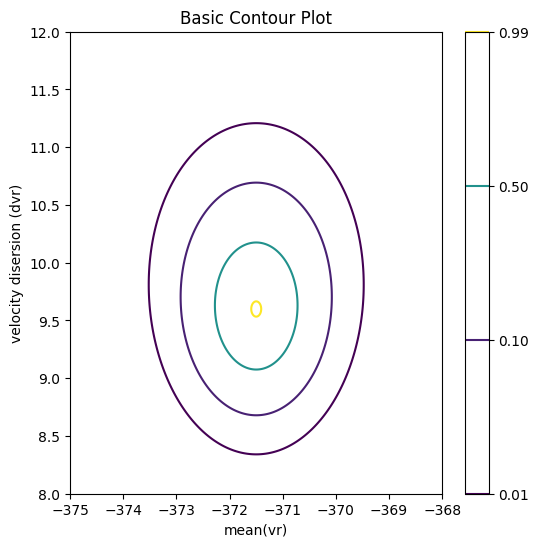

In [32]:
# This is the contour plot of Likelihood, we want it to be normalized to the maximum value
levels = np.array([0.01, 0.1, 0.5, 0.99])
plt.figure(figsize=(6,6))
contour = plt.contour(mvr_grid, dvr_grid, np.exp(logL_grid.T-np.max(logL_grid)), levels=levels)
cbar = plt.colorbar(contour)  # Add colorbar

plt.title('Basic Contour Plot')
plt.xlabel('mean(vr)')
plt.ylabel('velocity disersion (dvr)')
plt.show()

In [59]:
pdf_mvr = np.arange(len(mvr_grid))
pdf_dvr = np.arange(len(dvr_grid))

for i in range(len(mvr_grid)):

    pdf_mvr[i] = np.exp(logL_grid[i, :]-np.max(logL_grid)).sum()
    pdf_dvr[i] = np.exp(logL_grid[:, i]-np.max(logL_grid)).sum()


pdf_mvr = pdf_mvr/pdf_mvr.sum()
pdf_dvr = pdf_dvr/pdf_dvr.sum()

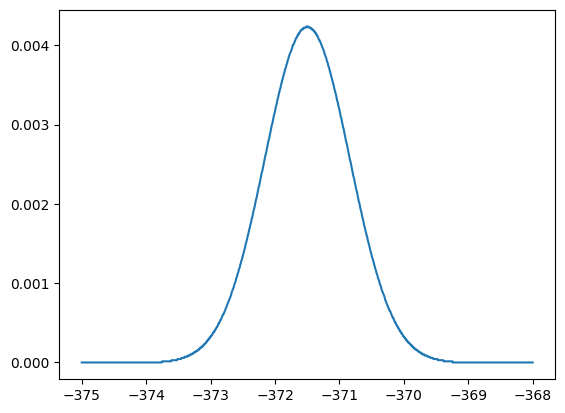

In [60]:
plt.figure()
plt.plot(mvr_grid, pdf_mvr, label='PDF mean(vr)')

In [64]:
# Now we can get the 16th and 84th percentile of each PDFs
grid = np.arange(len(mvr_grid))
likelihood_mvr = np.zeros(len(grid))
likelihood_dvr = np.zeros(len(grid))


for i in range (len(grid)):

    ind = grid <= grid[i]

    likelihood_mvr[i] = pdf_mvr[ind].sum()
    likelihood_dvr[i] = pdf_dvr[ind].sum()

In [106]:
ind_16 =  likelihood_dvr >= 0.16
ind_84 =  likelihood_dvr >= 0.84
ind_50 =  likelihood_dvr >= 0.5

print ("%.1f"%dvr_grid[ind_16][0], "%.1f"%dvr_grid[ind_50][0], "%.1f"%dvr_grid[ind_84][0])


ind1 = pdf_dvr >= np.exp(-0.5)*pdf_dvr.max()
print ("%.1f"%dvr_grid[ind1][0], "%.1f"%dvr_grid[ind1][-1])
ind_max = np.argmax(pdf_dvr)
print ("%.1f"%dvr_grid[ind_max])

9.2 9.7 10.1
9.2 10.1
9.6


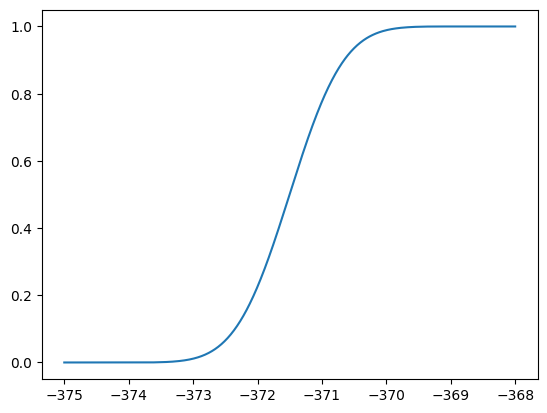

In [67]:
plt.figure()
plt.plot(mvr_grid, likelihood_mvr, label='PaDF mean(vr)')

-372.1
-371.5
-370.8


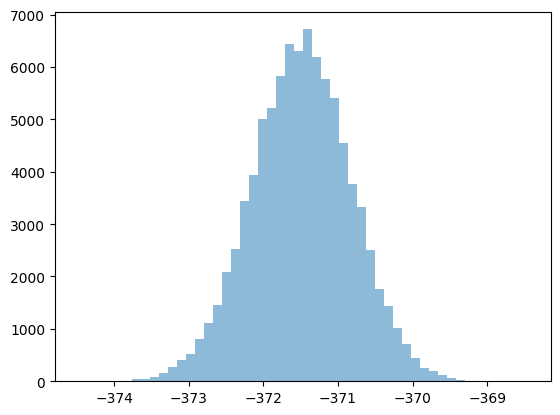

In [102]:
plt.figure()
plt.hist(chain[:,0], bins=50, alpha=0.5, label='mvr');


print ("%.1f"%np.percentile(chain[:,0], 16))
print ("%.1f"%np.percentile(chain[:,0], 50))
print ("%.1f"%np.percentile(chain[:,0], 84))

